#### 2-1) Linear_regression.txt 파일을 파일 입출력 객체를 활용하여 읽고 각각 list 에 데이터에 저장하시오. 

In [36]:
f = open("linear_regression.txt", 'r') # linear_regression.txt 파일을 읽기 전용으로 open
lines = f.readlines() # 모든 라인의 데이터를 load

for line in lines:
    line_data = line.split(' ') # split 명령어 안에 있는 string 데이터로 데이터를 나누어 리스트형태로 변환하는 함수
                        # (‘ ’)은 공백을 기준으로 데이터를 나눔
    
    line_data[2] = line_data[2].replace('\n','') # \n 제거

    print(line_data[0] + ", ", end='') # 0번 출력
    print(line_data[1] + " hours, ", end='') # 1번 출력
    print(line_data[2] + " dolls") # 2번 출력
    
f.close()

A, 2.5 hours, 11 dolls
B, 3.2 hours, 14 dolls
C, 4.1 hours, 21 dolls
D, 5.0 hours, 27 dolls
E, 6.3 hours, 33 dolls
F, 7.0 hours, 36 dolls
G, 8.2 hours, 43 dolls
H, 9.1 hours, 48 dolls
I, 10.3 hours, 52 dolls
J, 11.5 hours, 57 dolls


#### 2-2) 최소제곱법(Least square method)를 이용하여, 문제 2-1)에서 읽은 데이터에 대한 linear regression(선형회귀 모델 학습)을 수행하라

In [42]:
import numpy as np
import math

f = open("linear_regression.txt", 'r') # linear_regression.txt 파일을 읽기 전용으로 open
lines = f.readlines() # 모든 라인의 데이터를 load

hours_ = []
number_ = []
for line in lines:
    index, hours, number = map(str, line.split()) # split 명령어 안에 있는 string 데이터로 데이터를 나누어 리스트형태로 변환하는 함수
                        # ()은 공백을 기준으로 데이터를 나눔  
    hours_.append(float(hours)) # hours_라는 리스트에는 hours 데이터값이 전부 들어있음
    number_.append(float(number)) # number 라는 리스트에는 number 데이터값이 전부 들어있음

A = hours_ # 대입
B = number_ # 대입

A_mean = np.mean(A) # 평균 구하기 (작업 시간을 독립변수 A로)
B_mean = np.mean(B) # 평균 구하기 (작업 시간에 따른 인형 수를 종속변수 b로 설정)

sum_Ab = sum([(A[i] - A_mean ) * ( B[i] - B_mean) for i in range (len(A))]) # (x - x의 평균) * (y - y의 평균) 들의 총합
sum_A = sum([math.pow(i - A_mean, 2) for i in A]) # (x - x의 평균)^2 들의 총합
a = sum_Ab / sum_A # 나눠주기
b = B_mean - (A_mean * a) # y의 평균 - (x의 평균 * a)

print("파라미터 a :", a) # 파라미터 a 출력
print("파라미터 b :", b) # 파라미터 b 출력

파라미터 a : 5.19786147310134
파라미터 b : -0.7296290992410022


In [40]:
# 참고 3 코드 참조!!!
import numpy as np

f = open("linear_regression.txt", 'r') # linear_regression.txt 파일을 읽기 전용으로 open
lines = f.readlines() # 모든 라인의 데이터를 load

hours_ = []
number_ = []
for line in lines:
    index, hours, number = map(str, line.split()) # split 명령어 안에 있는 string 데이터로 데이터를 나누어 리스트형태로 변환하는 함수
                        # ()은 공백을 기준으로 데이터를 나눔  
    hours_.append(float(hours)) # hours_라는 리스트에는 hours 데이터값이 전부 들어있음
    number_.append(float(number)) # number 라는 리스트에는 number 데이터값이 전부 들어있음

X = np.array(hours_).reshape(-1, 1) # np.array로 전환
y = np.array(number_) # np.array로 전환

# X에 상수항 열을 추가하여 절편을 나타냄
X = np.hstack((np.ones_like(X), X))

# 최소 제곱법을 사용하여 계수 계산
c = np.linalg.lstsq(X, y, rcond=None)[0]

# 계수 출력
print("파라미터 a :", c[1])
print("파라미터 b :", c[0])

파라미터 a : 5.197861473101343
파라미터 b : -0.7296290992410277


#### 2-3) 구해진 선형 모델 및 학습 데이터를 matplotlib 를 이용하여 시각화하시오

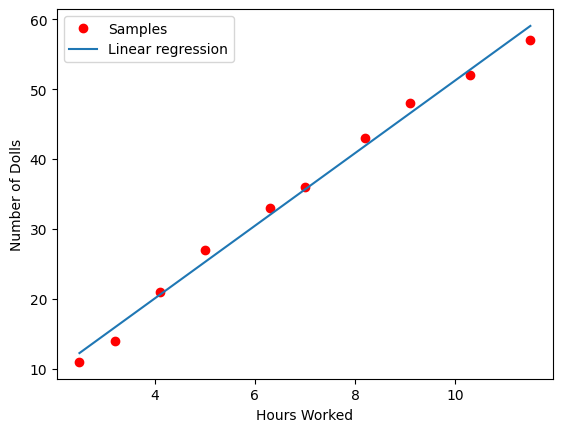

In [38]:
from matplotlib import pyplot as plt # import matplotlib

x = A # 실제 작업시간 리스트
y_estimate = [(a*i + b) for i in x] # y=ax+b에서 구한 예측값

plt.plot(A,B,'ro') # 빨간색 o모양 점 출력
plt.plot(x,y_estimate) # 그래프 그리기
plt.xlabel('Hours Worked') # xlabel 설정
plt.ylabel('Number of Dolls') # ylabel 설정
plt.legend(['Samples', 'Linear regression']) # 왼쪽 위 legend 설정
plt.show() # 그래프 보여주기

#### 2-4) 학습된 선형 회귀 모델에 의해 7.3 시간 작업하였을 때 완성한 인형 수는 몇 개라 예측할 수 있는가? 

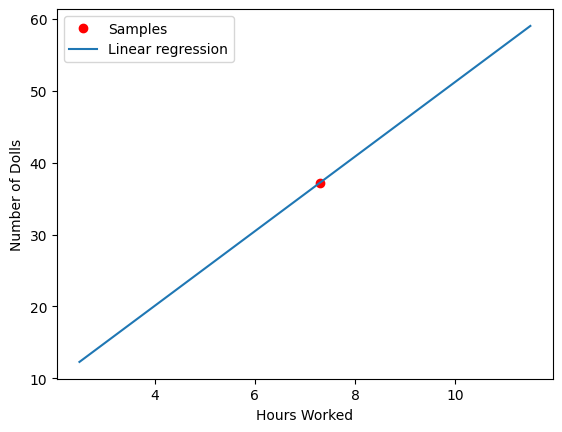

학습 모델에 의해 예측한 7.3 시간 작업하였을 때 완성된 인형은 37.214759654398776 개입니다. 


In [39]:
x_sample = 7.3 # 7.3 시간
y_estimate_sample = a*x_sample + b # 선형 회귀 모델에 대입

plt.plot(x_sample,y_estimate_sample,'ro') # 빨간색 o모양 점 출력
plt.plot(x,y_estimate) # 그래프 그리기
plt.xlabel('Hours Worked') # xlabel 설정
plt.ylabel('Number of Dolls') # ylabel 설정
plt.legend(['Samples', 'Linear regression']) # 왼쪽 위 legend 설정
plt.show() # 그래프 보여주기


print("학습 모델에 의해 예측한 7.3 시간 작업하였을 때 완성된 인형은", y_estimate_sample, "개입니다. ") # 7.3 시간 작업하였을 때 완성한 인형 수의 예측값 출력